# HREEYA SINGH

# LGMVIP - DataScience Intern, March-2022
## Task3 - Iris Flowers Classification ML Project

Import these libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()

In [11]:
df['Target']=le.fit_transform(df['Species'])

In [12]:
df #df.drop(['Id'], axis=1, inplace=true)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [13]:
df.shape

(150, 7)

In [14]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

C:\Users\HREEYA SINGH\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HREEYA SINGH\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HREEYA SINGH\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


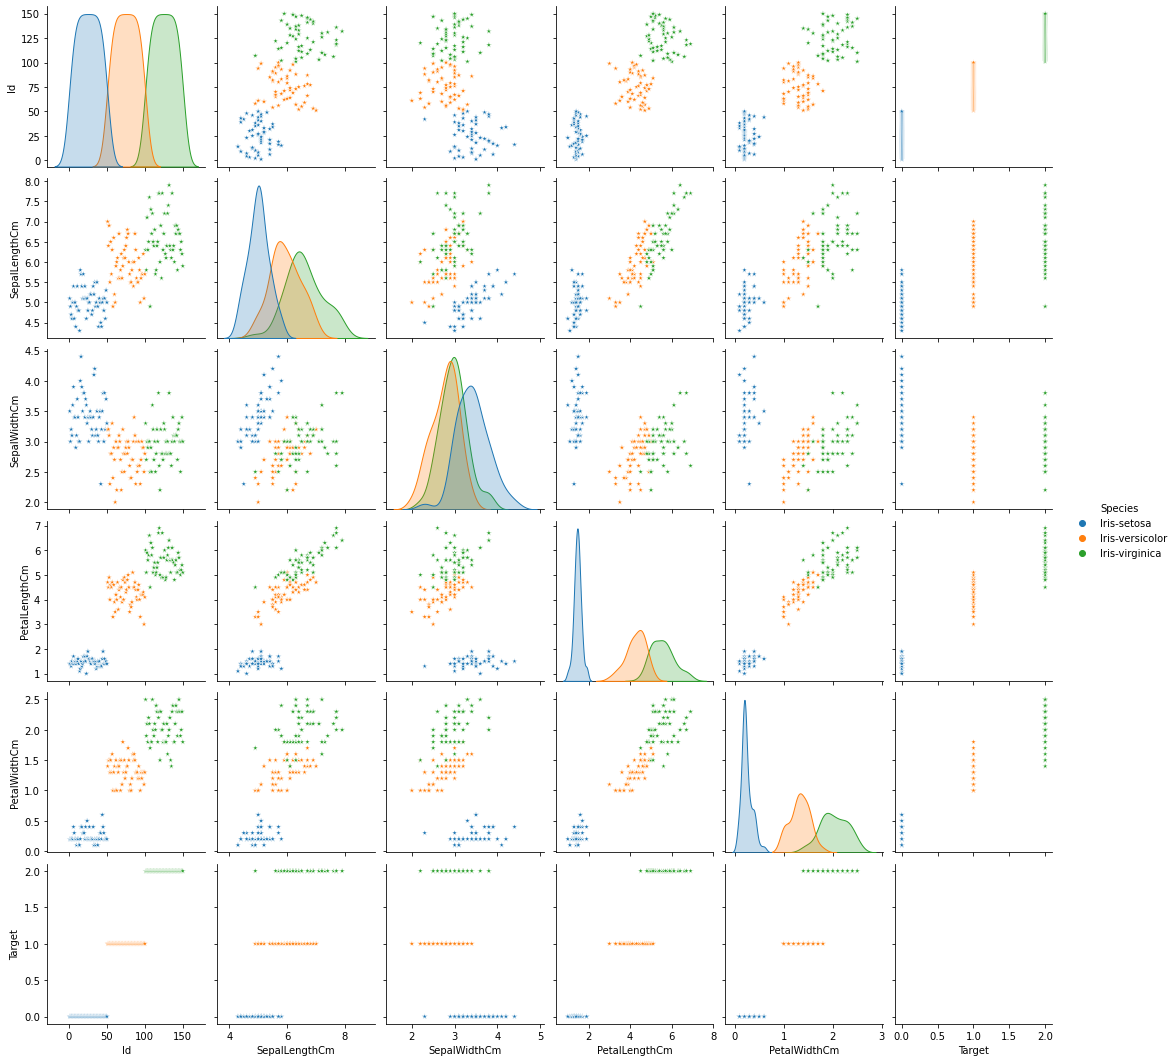

In [15]:
sns.pairplot(df, hue='Species', markers='*')
plt.show()

Data Visualization - Graphs of features vs Species

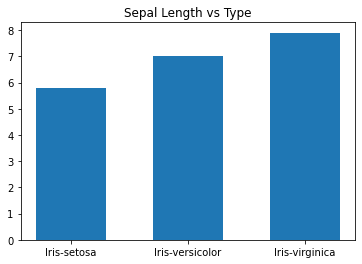

In [16]:
plt.bar(df['Species'],df['SepalLengthCm'], width = 0.6) 
plt.title("Sepal Length vs Type")
plt.show()

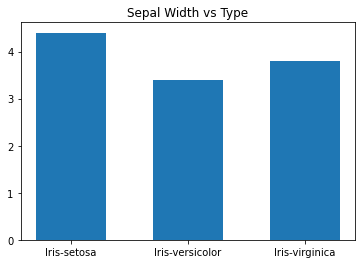

In [17]:
plt.bar(df['Species'],df['SepalWidthCm'], width = 0.6) 
plt.title("Sepal Width vs Type")
plt.show()

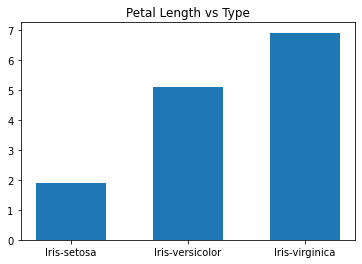

In [18]:
plt.bar(df['Species'],df['PetalLengthCm'], width = 0.6) 
plt.title("Petal Length vs Type")
plt.show()

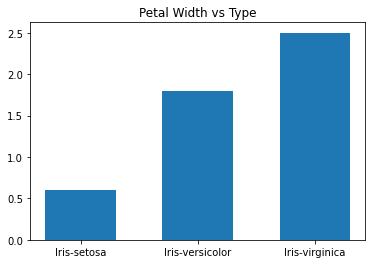

In [19]:
plt.bar(df['Species'],df['PetalWidthCm'], width = 0.6) 
plt.title("Petal Width vs Type")
plt.show()

In [20]:
sns.set_style("darkgrid")
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

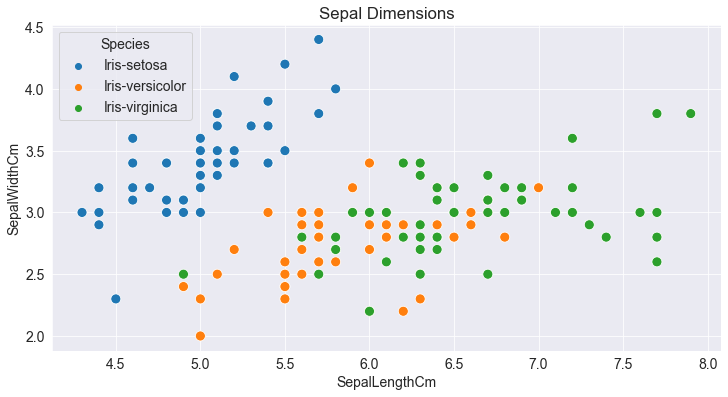

In [21]:
plt.figure(figsize=(12,6))
plt.title('Sepal Dimensions')
sns.scatterplot(x = df.SepalLengthCm, 
y = df.SepalWidthCm,
hue = df.Species, s = 100);

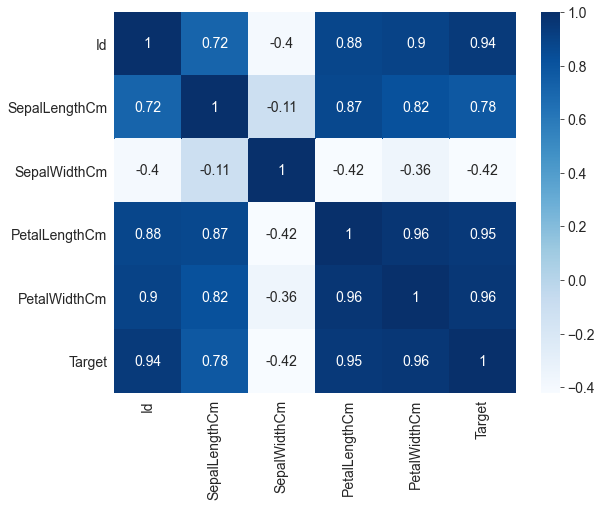

In [22]:
plt.figure(figsize=(9, 7))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

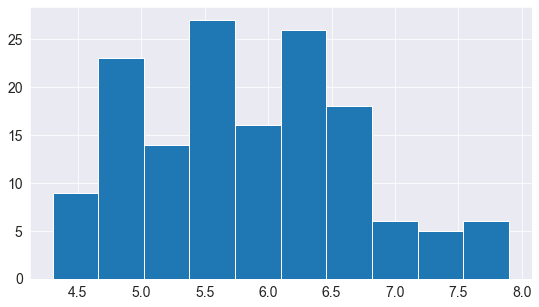

In [23]:
plt.hist(df.SepalLengthCm);

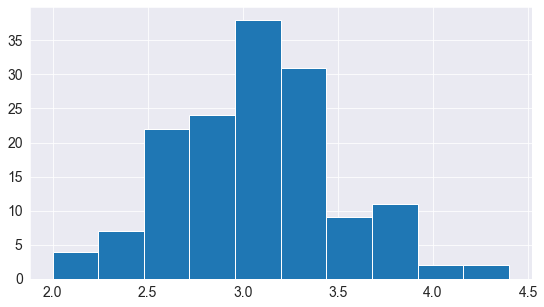

In [24]:
plt.hist(df.SepalWidthCm);

In [25]:
setosa_df = df[df.Species == 'Iris-setosa']
versicolor_df = df[df.Species == 'Iris-versicolor']
virginica_df = df[df.Species == 'Iris-virginica']

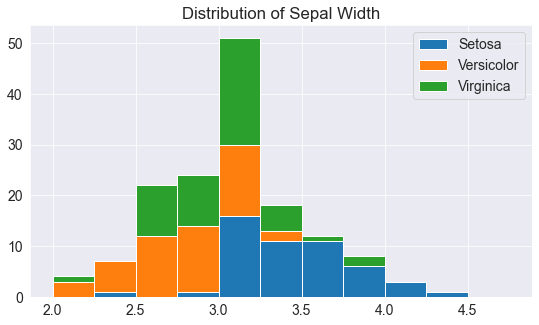

In [26]:
plt.title('Distribution of Sepal Width')

plt.hist([setosa_df.SepalWidthCm, versicolor_df.SepalWidthCm, virginica_df.SepalWidthCm], 
         bins=np.arange(2, 5, 0.25), 
         stacked=True);

plt.legend(['Setosa', 'Versicolor', 'Virginica']);

In [27]:
x = df.drop(columns="Species")
y = df["Species"]

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 1)

In [29]:
x_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Target
11,12,4.8,3.4,1.6,0.2,0
113,114,5.7,2.5,5.0,2.0,2
123,124,6.3,2.7,4.9,1.8,2
12,13,4.8,3.0,1.4,0.1,0
2,3,4.7,3.2,1.3,0.2,0


In [30]:
x_test.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Target
14,15,5.8,4.0,1.2,0.2,0
98,99,5.1,2.5,3.0,1.1,1
75,76,6.6,3.0,4.4,1.4,1
16,17,5.4,3.9,1.3,0.4,0
131,132,7.9,3.8,6.4,2.0,2


In [31]:
y_train.head()

11        Iris-setosa
113    Iris-virginica
123    Iris-virginica
12        Iris-setosa
2         Iris-setosa
Name: Species, dtype: object

In [32]:
y_test.head()

14         Iris-setosa
98     Iris-versicolor
75     Iris-versicolor
16         Iris-setosa
131     Iris-virginica
Name: Species, dtype: object

In [33]:
print("x_train: ", len(x_train))
print("x_test: ", len(x_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

x_train:  90
x_test:  60
y_train:  90
y_test:  60


# Logistic Regression Method

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [35]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\HREEYA SINGH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
predict = model.predict(x_test)
print("Pridicted values on Test Data", predict)

Pridicted values on Test Data ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-

In [37]:
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

In [38]:
print("Training Accuracy : ", accuracy_score(y_train, y_train_pred))
print("Test Accuracy : ", accuracy_score(y_test, y_test_pred))

Training Accuracy :  1.0
Test Accuracy :  1.0


In [39]:
y_pred = model.predict(x_test)

In [40]:
probs_y = model.predict_proba(x_test)
probs_y = np.round(probs_y, 2)

In [41]:
result = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test_pred", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
result += "-"*65+"\n"
result += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test_pred, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
result += "\n"+"-"*65+"\n"
print(result)

y_test_pred | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
Iris-setosa | Iris-setosa | 1.0        | 0.0           | 0.0       
Iris-versicolor | Iris-versicolor | 0.0        | 0.71          | 0.29      
Iris-versicolor | Iris-versicolor | 0.0        | 1.0           | 0.0       
Iris-setosa | Iris-setosa | 1.0        | 0.0           | 0.0       
Iris-virginica | Iris-virginica | 0.0        | 0.0           | 1.0       
Iris-versicolor | Iris-versicolor | 0.04       | 0.96          | 0.0       
Iris-virginica | Iris-virginica | 0.0        | 0.0           | 1.0       
Iris-setosa | Iris-setosa | 0.98       | 0.02          | 0.0       
Iris-setosa | Iris-setosa | 0.99       | 0.01          | 0.0       
Iris-virginica | Iris-virginica | 0.0        | 0.0           | 1.0       
Iris-versicolor | Iris-versicolor | 0.0        | 0.91          | 0.09      
Iris-setosa | Iris-setosa | 1.0        | 0.0           | 0.0       

# Confusion Matrix

In [42]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[19  0  0]
 [ 0 21  0]
 [ 0  0 20]]


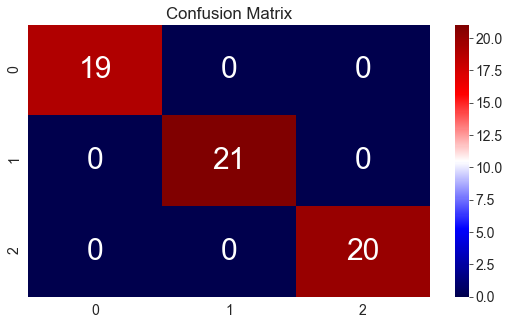

In [43]:
axes = plt.axes()
conf_mat_df = conf_mat
sns.heatmap(conf_mat_df, annot=True, annot_kws={"size": 30}, fmt='d',cmap="seismic", ax = axes )
axes.set_title('Confusion Matrix')
plt.show()

# Decision Trees Method

In [44]:
X=df.drop(["Id", 'Species', 'Target'], axis=1)
y=df['Target']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=101)

In [45]:
model=DecisionTreeClassifier(max_depth=4, max_features='auto')

In [46]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features='auto')

In [47]:
y_pred=model.predict(x_test)

In [48]:
accuracy_score(y_test, y_pred)

0.9

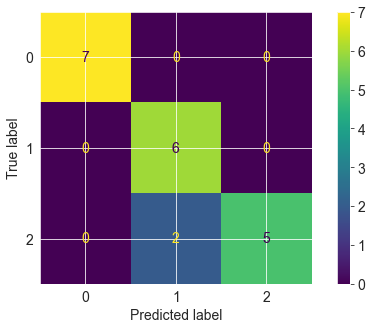

In [49]:
plot_confusion_matrix(model, x_test, y_test)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.75      1.00      0.86         6
           2       1.00      0.71      0.83         7

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.93      0.90      0.90        20



In [51]:
from sklearn.tree import plot_tree

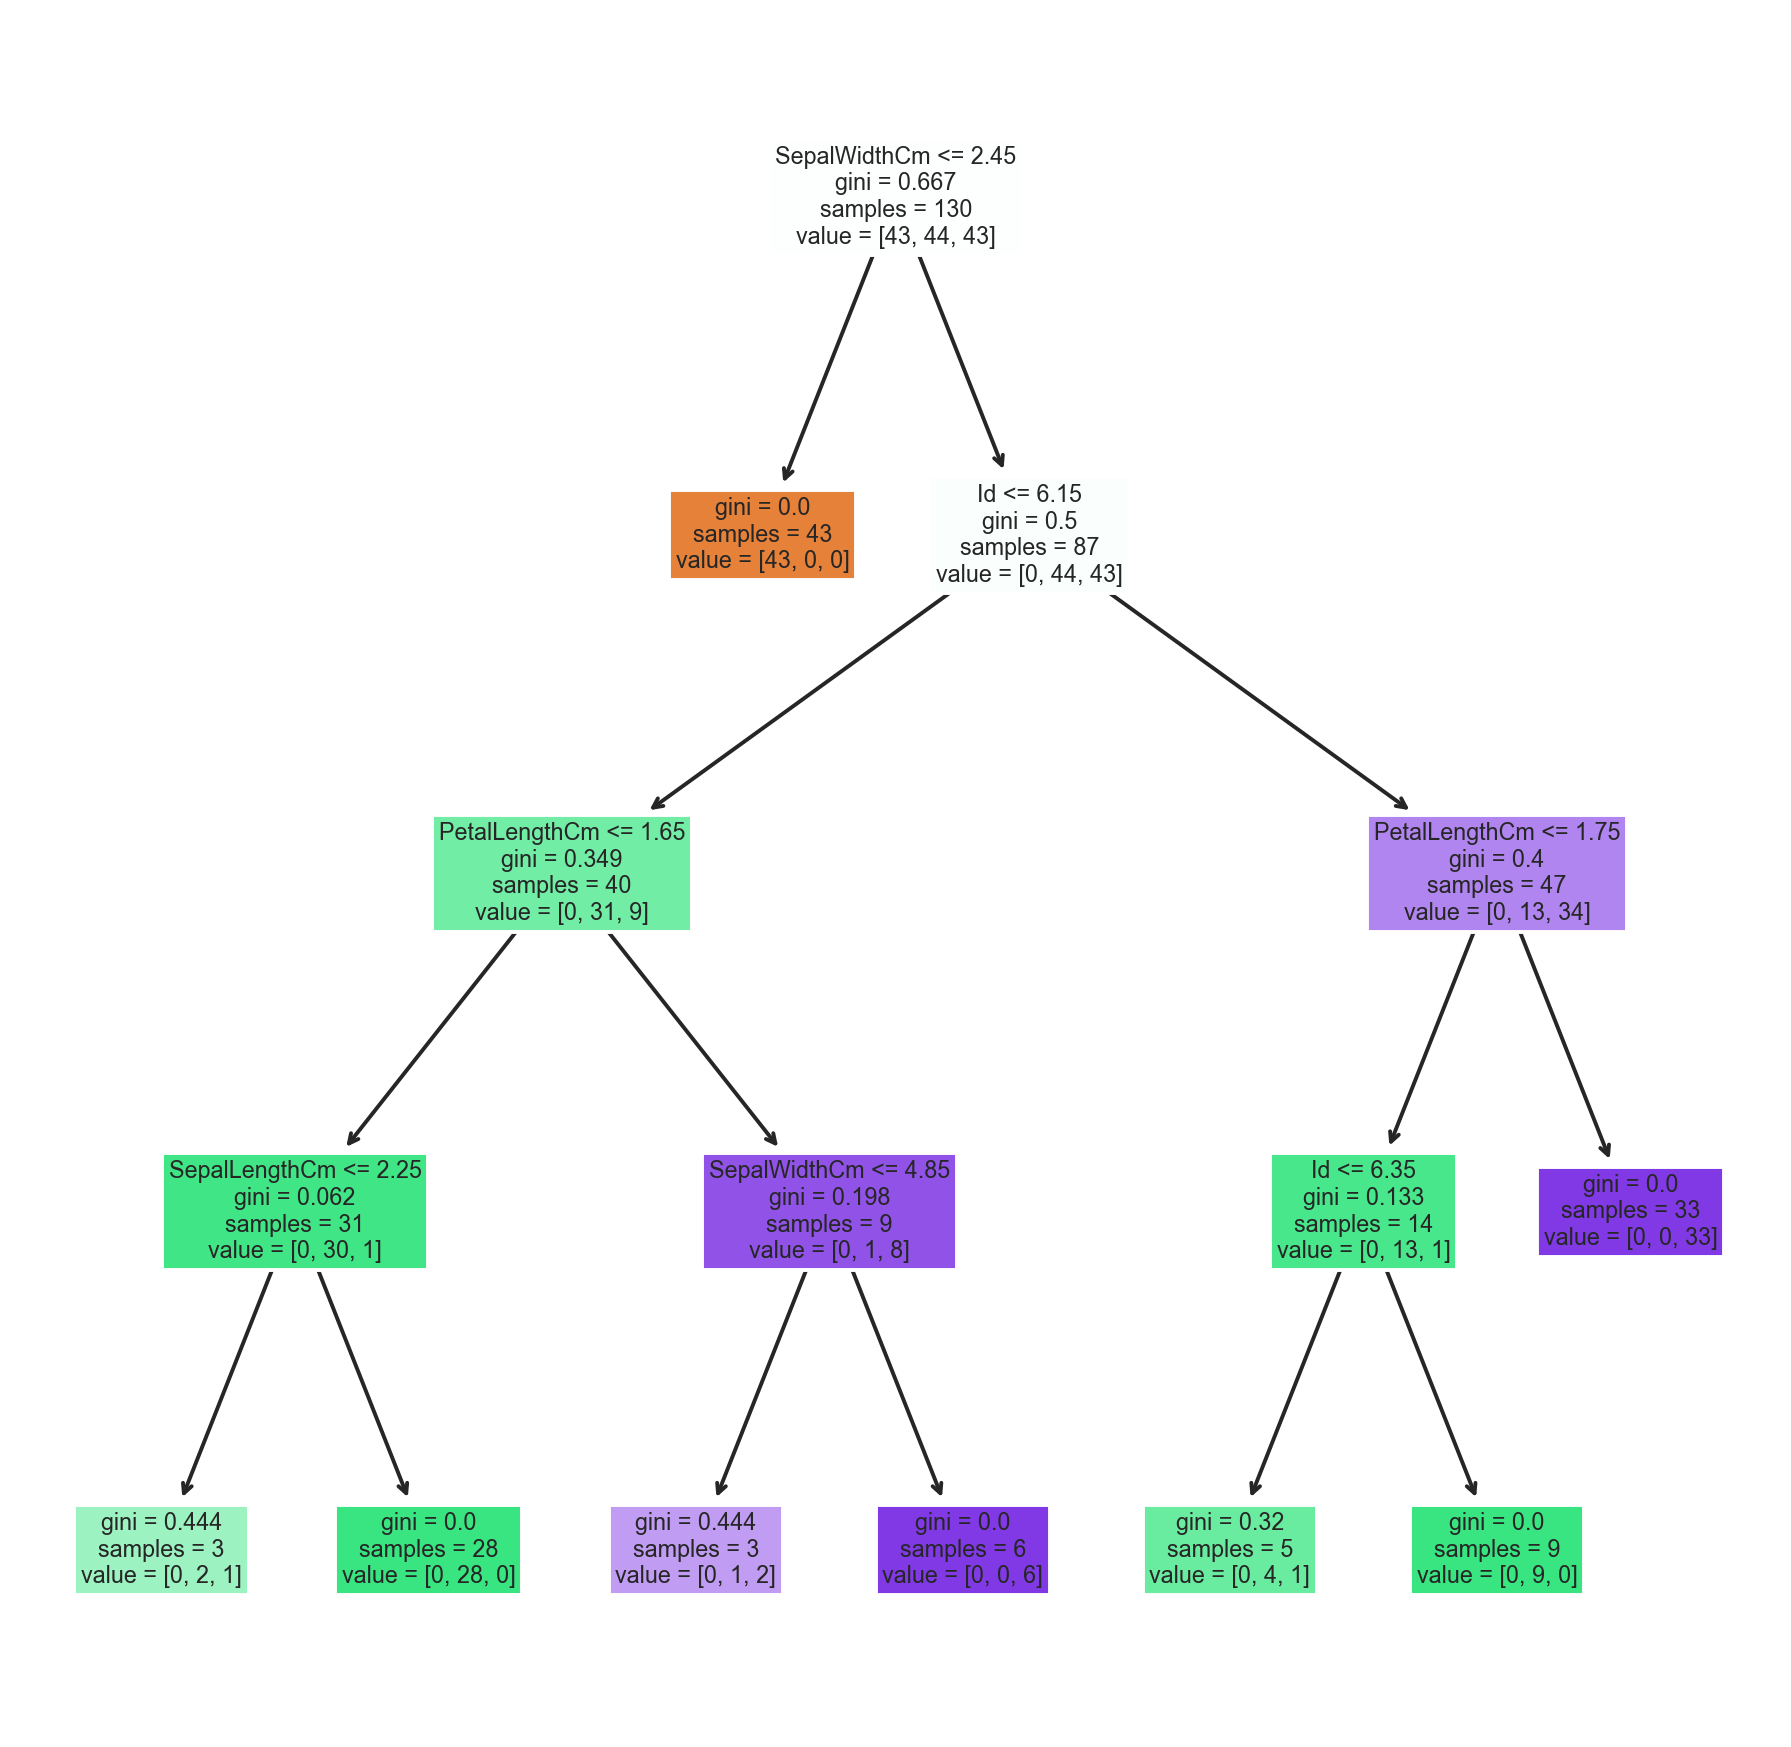

In [52]:
plt.figure(figsize=(8,8), dpi=280)
plot_tree(model, filled=True, feature_names=x.columns);

Testing Model

In [54]:
y_pred2=model.predict([[5.0,9,1.2,3.2]])

if y_pred2==[0]:
    print("Iris-setosa")
elif y_pred==[1]:
    print("Iris-versicolor")
else:
    print("Iris-virginica")  

Iris-setosa
